**PREDICTING AD-CLICK**

In [69]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns
data=pd.read_csv('/content/Ad Click Data.csv')

In [49]:
data.head(3)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0.0,Tunisia,3/27/2016 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1.0,Nauru,4/4/2016 1:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0.0,San Marino,3/13/2016 20:35,0


**CHECKING FOR DUPLICATED RECORDS**

In [71]:
data.duplicated().sum()

0

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  987 non-null    float64
 1   Age                       1000 non-null   int64  
 2   Area Income               987 non-null    float64
 3   Daily Internet Usage      989 non-null    float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      999 non-null    object 
 6   Male                      997 non-null    float64
 7   Country                   991 non-null    object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 78.2+ KB


**Visualizing the distribution of Age **

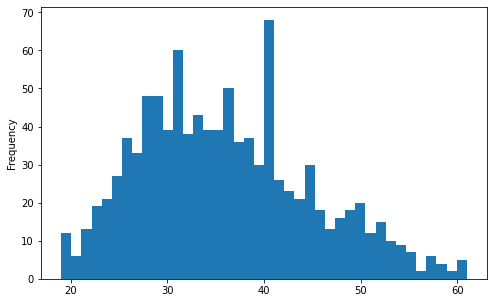

In [52]:
data.Age.plot.hist(bins=40, figsize=(8,5))

**INCOME DISTRIBUTION OF DIFFERENT AGE GROUPS **

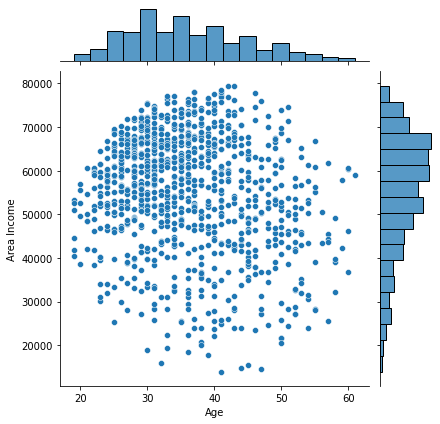

In [53]:
sns.jointplot(x='Age',y='Area Income',data=data)

**Which Age group spend what time on Internet**

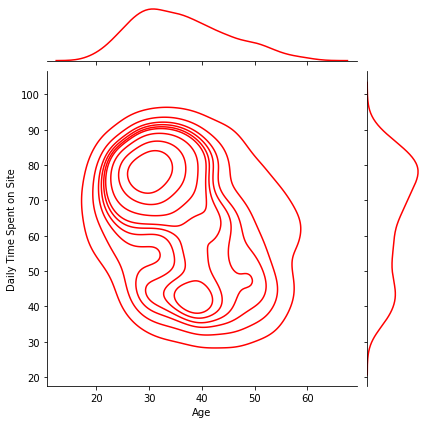

In [54]:
sns.jointplot(x='Age',y='Daily Time Spent on Site', data=data, kind='kde', color='red')

**What is the average amount of time spent on site versus time spent on Internet**

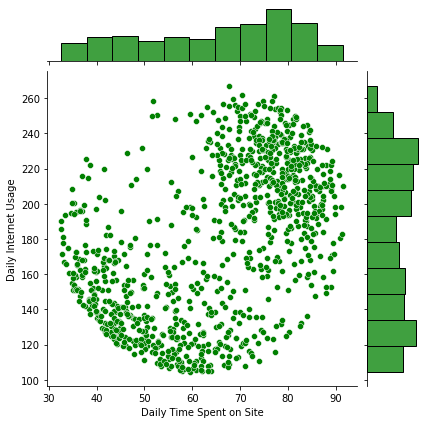

In [28]:
sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=data, color='green')

**Visualizing the Relationship between different Features**

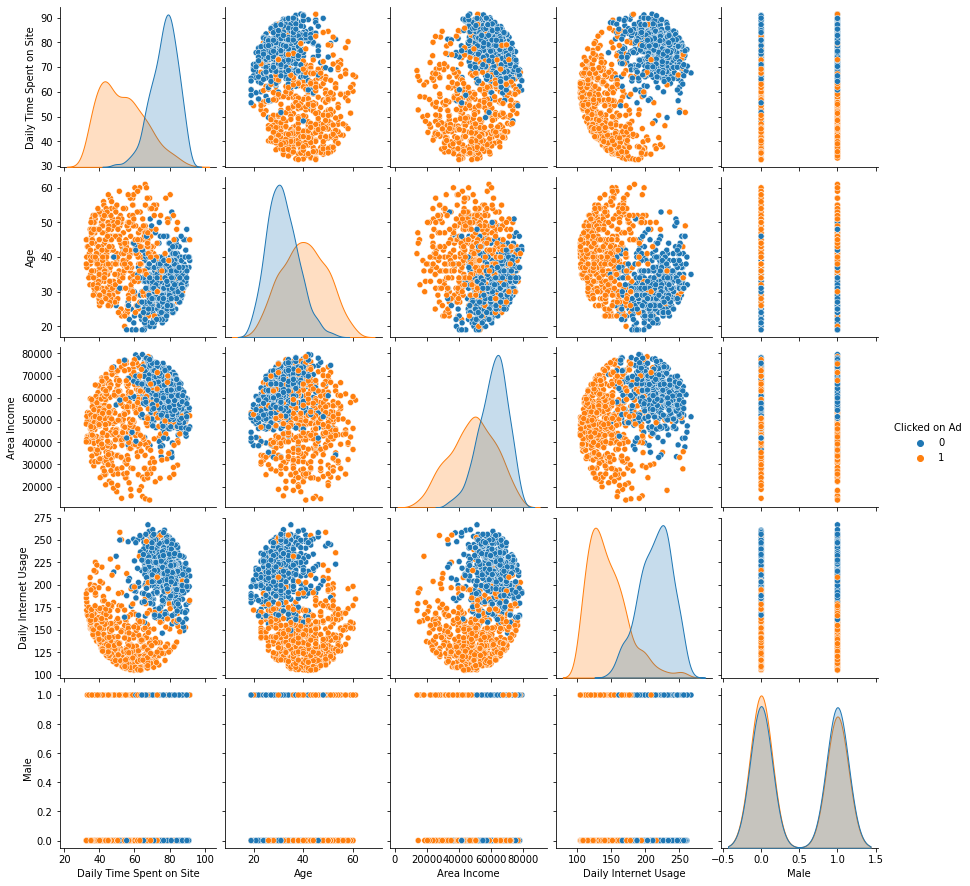

In [55]:
 sns.pairplot(data, hue='Clicked on Ad')

Dropping Null Values and Separating Dependent variable from Target Variable 

In [56]:
data.dropna(inplace=True)
x=data.iloc[:,[0,1,2,3,6]]
y=data.iloc[:,-1]

** **Splitting the Data into Train and Test** **

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

** Implementing Logistic Regression Model**

In [65]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(max_iter=200)
classifier.fit(x_train,y_train)


LogisticRegression(max_iter=200)

In [72]:
y_pred_log=classifier.predict(x_test)

In [67]:
from sklearn.metrics import classification_report,confusion_matrix

In [68]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       147
           1       0.92      0.86      0.89       139

    accuracy                           0.90       286
   macro avg       0.90      0.90      0.90       286
weighted avg       0.90      0.90      0.90       286

[[137  10]
 [ 19 120]]


**Implementing Naive Bayes**

In [78]:
from sklearn.naive_bayes import GaussianNB
nav_bayes_model = GaussianNB()
nav_bayes_model.fit(x_train, y_train)
y_pred_nav=nav_bayes_model.predict(x_test)

**Implementing Decision Tree Model **

In [73]:
from sklearn.tree import DecisionTreeClassifier

dec_tree_model = DecisionTreeClassifier()

dec_tree_model.fit(x_train, y_train)
y_pred_dec=dec_tree_model.predict(x_test)

**calculating accuracy in Each Model**

In [76]:
from sklearn.metrics import accuracy_score

**Logistic Regression**





In [77]:
log_reg_accuracy = accuracy_score(y_pred_log, y_test)
print(log_reg_accuracy*100)


89.86013986013987


**Naive Bayes**

In [79]:
nav_bayes_accuracy = accuracy_score(y_pred_nav, y_test)
print(nav_bayes_accuracy*100)

97.2027972027972


**Decision Tree**

In [81]:

dec_tree_accuracy = accuracy_score(y_pred_dec, y_test)
print(dec_tree_accuracy*100);

92.3076923076923


**CONCLUSION:
When all of the above implementation models are compared, we conclude that the Naive Bayes Algorithm provides the highest accuracy for determining the click probability. We believe that in the future, there will be fewer advertisements, but they will be more relevant. Furthermore, these advertisements will be more expensive, but they will be worthwhile.**